In [1]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

#from google.colab import files
import io

train_df = pd.read_csv('data/train_df.csv')
print(train_df.head)

test_df = pd.read_csv('data/test_df.csv')
print(test_df.head)

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212  

In [2]:
print(train_df.drop(['activity_name'], axis = 1))

train_df_2 = train_df.drop(['activity_name'], axis = 1)

train_arr = train_df_2.to_numpy()

x_train = train_arr[:, 0:561]
print(x_train.shape)

print(train_arr[:, 562])
y_train = train_arr[:, 562]
print(y_train.shape)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212   

      tBodyAccstdZ  tBodyAc

In [3]:
y_unique = np.unique(y_train)
print(y_train.dtype)
print(x_train.dtype)

float64
float64


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import time

params_svc = {'gamma':[pow(10,i) for i in range(1,-4, -1)], 'C':[pow(10,j) for j in range(0, 4, 1)]}
#svc.fit(x_train, y_train)
print("Grid search for optimal model")
start_time = time.time()
models = GridSearchCV(SVC(), params_svc).fit(x_train, y_train)
end_time = time.time()
print("Grid search took %6f seconds" % (end_time - start_time))

Grid search for optimal model
Grid search took 1791.898320 seconds


In [5]:
svc = models.best_estimator_
print(svc)

SVC(C=10, gamma=0.01)


In [6]:
#process test data
print(test_df.head)
test_df_2 = test_df.drop(['activity_name'], axis = 1)
print(test_df_2)

test_arr = test_df_2.to_numpy()

x_test = test_arr[:, 0:561]
print(x_test.shape)

print(test_arr[:, 562])
y_test = test_arr[:, 562]
print(y_test.shape)

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
1          0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
2          0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
3          0.274833      -0.027848      -0.129527     -0.993852     -0.967445   
4          0.279220      -0.018620      -0.113902     -0.994455     -0.970417   
...             ...            ...            ...           ...           ...   
2941       0.310155      -0.053391      -0.099109     -0.287866     -0.140589   
2942       0.363385      -0.039214      -0.105915     -0.305388      0.028148   
2943       0.349966       0.030077      -0.115788     -0.329638     -0.042143   
2944       0.237594       0.018467      -0.096499     -0.323114     -0.229775   
2945       0.153627      -0.018437      -0.137018     -0.330046     -0.195253  

In [7]:
from sklearn import metrics
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print(y_pred)

orig_acc = metrics.accuracy_score(y_test, y_pred)
print(orig_acc)

[5. 5. 5. ... 2. 2. 2.]
0.9256619144602851


In [8]:
from sklearn import decomposition

NUMBER_OF_COMPONENTS = 5
pca = decomposition.PCA(n_components = NUMBER_OF_COMPONENTS)
pca.fit(x_train)
t_X_train = pca.transform(x_train)
t_X_test = pca.transform(x_test)
print(t_X_train)
print(sum(pca.explained_variance_ratio_))

[[-5.53595974e+00 -8.22806169e-02 -1.92478809e+00  6.70104503e-01
   6.73568104e-01]
 [-5.47564261e+00  2.87628006e-01 -2.14483145e+00  5.32025809e-01
   2.09927990e-01]
 [-5.67793727e+00  8.97219483e-01 -2.01855685e+00  1.56695871e-01
   7.61300357e-01]
 ...
 [ 5.85680536e+00 -3.08188181e+00  6.71160955e-01  2.25507071e+00
  -4.88438883e-01]
 [ 5.42031851e+00 -3.42653409e+00  6.70721908e-01  2.01657945e+00
  -6.05954929e-01]
 [ 5.49719741e+00 -2.78996025e+00  5.15023360e-03  1.39607946e+00
  -8.00532655e-01]]
0.7516082811860655


In [9]:
svc.fit(t_X_train, y_train)
t_y_pred = svc.predict(t_X_test)
acc = metrics.accuracy_score(y_test, t_y_pred)
print(acc)

0.7895451459606245


In [10]:
component_list = [2, 3, 4]
for i in range(5, 100, 5):
    component_list.append(i)
    
for i in range(100, 550, 50):
    component_list.append(i)
    
print(component_list)

[2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 150, 200, 250, 300, 350, 400, 450, 500]


In [16]:
results = []
acc_list = []
var_list = []
pred_var_list = []

for c in component_list:
    pca = decomposition.PCA(n_components = c)
    pca.fit(x_train)
    t_X_train = pca.transform(x_train)
    t_X_test = pca.transform(x_test)
    
    svc.fit(t_X_train, y_train)
    t_y_pred = svc.predict(t_X_test)
    
    variation = metrics.explained_variance_score(y_test, t_y_pred, multioutput='uniform_average')
    
    
    acc = metrics.accuracy_score(y_test, t_y_pred)
    var = sum(pca.explained_variance_ratio_)
    results.append([c, acc, var])
    acc_list.append(acc)
    var_list.append(var)
    pred_var_list.append(variation)
    
    print("Number of components: %i, Accuracy:%.6f, Variance: %.6f" %(c, acc, var))

Number of components: 2, Accuracy:0.587237, Variance: 0.674699
Number of components: 3, Accuracy:0.743381, Variance: 0.715914
Number of components: 4, Accuracy:0.758316, Variance: 0.734662
Number of components: 5, Accuracy:0.789545, Variance: 0.751608
Number of components: 10, Accuracy:0.845214, Variance: 0.805061
Number of components: 15, Accuracy:0.849627, Variance: 0.835761
Number of components: 20, Accuracy:0.863544, Variance: 0.857860
Number of components: 25, Accuracy:0.874067, Variance: 0.875767
Number of components: 30, Accuracy:0.880855, Variance: 0.890633
Number of components: 35, Accuracy:0.885947, Variance: 0.903238
Number of components: 40, Accuracy:0.893075, Variance: 0.913942
Number of components: 45, Accuracy:0.895112, Variance: 0.923092
Number of components: 50, Accuracy:0.896470, Variance: 0.930865
Number of components: 55, Accuracy:0.901561, Variance: 0.937600
Number of components: 60, Accuracy:0.908690, Variance: 0.943201
Number of components: 65, Accuracy:0.911745,

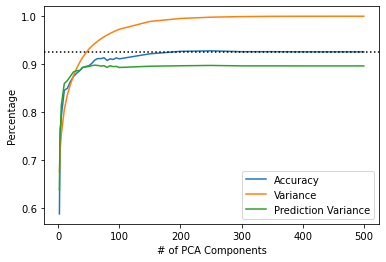

In [17]:
import matplotlib.pyplot as plt
line1=plt.plot(component_list, acc_list)
line2=plt.plot(component_list, var_list)
line3=plt.plot(component_list, pred_var_list)
plt.axhline(y=orig_acc, color = 'k', linestyle = ':')
plt.xlabel("# of PCA Components")
plt.ylabel("Percentage")
plt.legend((line1[0], line2[0], line3[0]), ('Accuracy', 'Variance', 'Prediction Variance'))
plt.show()

In [22]:
#output to CSV file
pca_df = pd.DataFrame(list(zip(component_list, acc_list, var_list,pred_var_list))
                      ,columns = ['Component', 'Accuracy', 'Component Variance', 'Prediction Variance'])
print(pca_df)
pd.DataFrame(pca_df).to_csv('PCA_results.csv')

    Component  Accuracy  Component Variance  Prediction Variance
0           2  0.587237            0.674699             0.637418
1           3  0.743381            0.715914             0.765658
2           4  0.758316            0.734662             0.773397
3           5  0.789545            0.751608             0.813393
4          10  0.845214            0.805061             0.859523
5          15  0.849627            0.835761             0.865708
6          20  0.863544            0.857860             0.874595
7          25  0.874067            0.875767             0.883827
8          30  0.880855            0.890633             0.886150
9          35  0.885947            0.903238             0.886668
10         40  0.893075            0.913942             0.893006
11         45  0.895112            0.923092             0.894148
12         50  0.896470            0.930865             0.895075
13         55  0.901561            0.937600             0.896924
14         60  0.908690  